In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df = pd.read_csv('iris.data', header = None, names=column_names)
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 1 question

In [3]:
variance = df.groupby("species")["sepal length"].var()
std = df.groupby("species")["sepal length"].std()

print("Variance:")
print(variance)

print("\nStandard Deviation:")
print(std)

Variance:
species
Iris-setosa        0.124249
Iris-versicolor    0.266433
Iris-virginica     0.404343
Name: sepal length, dtype: float64

Standard Deviation:
species
Iris-setosa        0.352490
Iris-versicolor    0.516171
Iris-virginica     0.635880
Name: sepal length, dtype: float64


# 2 question

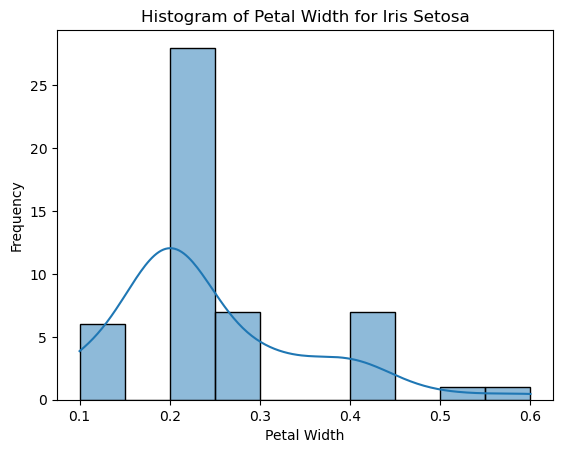

In [14]:
setosa_data = df[df['species'] == 'Iris-setosa']['petal width']

sns.histplot(setosa_data, kde=True)
plt.title('Histogram of Petal Width for Iris Setosa')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')

plt.show()

# 3 question

In [5]:
from scipy.stats import mode

sepal_width_data = df['sepal width']

mode_result = mode(sepal_width_data, keepdims=True)

print(f"Mode of Sepal Width: {mode_result.mode[0]}")

if len(mode_result.count) > 1:
    print("multimodal.")
else:
    print("unimodal.")

Mode of Sepal Width: 3.0
unimodal.


# 4 question

In [6]:
virginica = df[df['species'] == 'Iris-virginica']['petal length']
setosa = df[df['species'] == 'Iris-setosa']['petal length']
versicolor = df[df['species'] == 'Iris-versicolor']['petal length']

setosa_mean = setosa.mean()
setosa_std = setosa.std()

versicolor_mean = versicolor.mean()
versicolor_std = versicolor.std()

virginica_mean = virginica.mean()
virginica_std = virginica.std()

print("Iris Setosa Mean:", setosa_mean, ",Standard Deviation:", setosa_std)
print("Iris Versicolor Mean:", versicolor_mean, ",Standard Deviation:", versicolor_std)
print("Iris Virginica Mean:", virginica_mean, ",Standard Deviation:", virginica_std)

Iris Setosa Mean: 1.464 ,Standard Deviation: 0.1735111594364455
Iris Versicolor Mean: 4.26 ,Standard Deviation: 0.46991097723995806
Iris Virginica Mean: 5.5520000000000005 ,Standard Deviation: 0.5518946956639835


# 5 question 

In [7]:
setosa_sepal_length = df[df['species'] == 'Iris-setosa']['sepal length']

median_setosa_sepal_length = setosa_sepal_length.median()
mean_setosa_sepal_length = setosa_sepal_length.mean()

print(f"Median sepal length for Iris Setosa: {median_setosa_sepal_length}")
print(f"Mean sepal length for Iris Setosa: {mean_setosa_sepal_length}")

Median sepal length for Iris Setosa: 5.0
Mean sepal length for Iris Setosa: 5.006


# 6 question

In [8]:
Q1_Setosa = df[df['species'] == 'Iris-setosa']['petal width'].quantile(0.25)
Q3_Setosa = df[df['species'] == 'Iris-setosa']['petal width'].quantile(0.75)
iqr1 = Q3_Setosa - Q1_Setosa
print(iqr1)

Q1_versicolor = df[df['species'] == 'Iris-versicolor']['petal width'].quantile(0.25)
Q3_versicolor = df[df['species'] == 'Iris-versicolor']['petal width'].quantile(0.75)
iqr2 = Q3_versicolor - Q1_versicolor
print(iqr2)


Q1_virginica = df[df['species'] == 'Iris-virginica']['petal width'].quantile(0.25)
Q3_virginica = df[df['species'] == 'Iris-virginica']['petal width'].quantile(0.75)
iqr3 = Q3_virginica - Q1_virginica
print(iqr3)

0.09999999999999998
0.30000000000000004
0.4999999999999998


# 7 question

In [9]:
subset_data = df[df['sepal width'] < 3]

subset_mean = subset_data['sepal length'].mean()
subset_std = subset_data['sepal length'].std()

overall_mean = df['sepal length'].mean()
overall_std = df['sepal length'].std()

print(f"Mean instances where sepal width is less than 3 cm < 3 cm: {subset_mean}")
print(f"Standard deviation instances where sepal width is less than 3 cm: {subset_std}")

print(f"\nOverall mean sepal length: {overall_mean}")
print(f"Overall standard deviation of sepal length: {overall_std}")

Mean instances where sepal width is less than 3 cm < 3 cm: 5.9526315789473685
Standard deviation instances where sepal width is less than 3 cm: 0.6766791978789547

Overall mean sepal length: 5.843333333333334
Overall standard deviation of sepal length: 0.8280661279778629


# 8 question

In [10]:
subset_data = df[(df['sepal width'] >= 2.5) & (df['sepal width'] <= 3.0)]

versicolour_probability = len(subset_data[subset_data['species'] == 'Iris-versicolor']) / len(subset_data) * 100

print(f"Probability of Iris Versicolour given sepal width between 2.5 and 3.0 cm: {versicolour_probability}%")

Probability of Iris Versicolour given sepal width between 2.5 and 3.0 cm: 45.83333333333333%


# 9 question

In [18]:
percentiles = df.groupby('species')['petal length'].quantile([0.1, 0.9]).unstack()
percentiles['range'] = percentiles[0.9] - percentiles[0.1]

print("10th and 90th percentiles of petal length for each class:")
print(percentiles)

,0.1,0.9,range
species,,,
Iris-setosa,1.30,1.70,0.40
Iris-versicolor,3.59,4.80,1.21
Iris-virginica,4.90,6.31,1.41


# 10 question

In [12]:
correlation_by_class = df.groupby('species')[['sepal length', 'sepal width']].corr()

print("Correlation coefficient between sepal length and sepal width for each class:")
print(correlation_by_class)

Correlation coefficient between sepal length and sepal width for each class:
                              sepal length  sepal width
species                                                
Iris-setosa     sepal length      1.000000     0.746780
                sepal width       0.746780     1.000000
Iris-versicolor sepal length      1.000000     0.525911
                sepal width       0.525911     1.000000
Iris-virginica  sepal length      1.000000     0.457228
                sepal width       0.457228     1.000000
